In [2]:
import pandas as pd
import numpy as np
import ast
import sys
import skimage.io
import skimage.viewer
import os
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression
import ast 
from scipy import stats
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


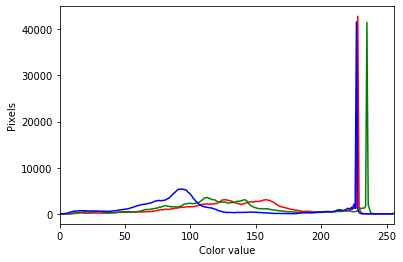

In [3]:

# read original image, in full color, based on command
# line argument
image = skimage.io.imread(fname=os.path.join(os.getcwd(), 'flattened_pics', '1548779251774.jpg'))

# display the image
#image = os.path.join(os.getcwd(), 'flattened_pics', '1548779251774.jpg')
#viewer = skimage.viewer.Viewer(image)
#viewer.show()

colors = ("r", "g", "b")
channel_ids = (0, 1, 2)
hist_dict = dict()
# create the histogram plot, with three lines, one for
# each color
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        image[:, :, channel_id], bins=256, range=(0, 256)
    )
    hist_dict[c] = histogram
    plt.plot(bin_edges[0:-1], histogram, color=c)
    

plt.xlabel("Color value")
plt.ylabel("Pixels")

plt.show()

In [4]:
def color_dist(x):
    image = skimage.io.imread(fname=os.path.join(os.getcwd(), 'flattened_pics', x))
    colors = ("r", "g", "b")
    channel_ids = (0, 1, 2)
    hist_dict = dict()
    # create the histogram plot, with three lines, one for
    # each color
    plt.xlim([0, 256])
    for channel_id, c in zip(channel_ids, colors):
        histogram, bin_edges = np.histogram(
            image[:, :, channel_id], bins = 256, range=(0, 256)
            )
        hist_dict[c] = histogram
    return hist_dict

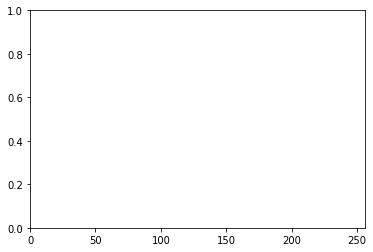

In [6]:
df = pd.read_csv('objects.csv')
pics = ['pic_1', 'pic_2_1','pic_2_2',  'pic_2_3',  'pic_2_4', 'pic_2_5']

for i in pics:
    p = i + 'rgb'
    df[p] = df[i].apply(color_dist)
    #print(df[p][0])

In [7]:
rgb = df[['Unnamed: 0', 'Unnamed: 1', 'municipality', 'commune', 'pic_1',
        'pic_2_1', 'pic_2_2', 
       'pic_2_3',  'pic_2_4',  'pic_2_5', 'pic_1.1','gpsLatitude', 'gpsLongitude',
       'address', 'total_income_2_b', 'total_deprivations',  'Wealth_Index',
       'total_deprivations_2', 'Poor_MPI', 'Severely_Poor_MPI', 'pic_1rgb',
       'pic_2_1rgb', 'pic_2_2rgb', 'pic_2_3rgb', 'pic_2_4rgb', 'pic_2_5rgb']]

In [8]:
r = lambda x: x['r']
g = lambda x: x['g']
b = lambda x: x['b']


pics = ['pic_1', 'pic_2_1','pic_2_2',  'pic_2_3',  'pic_2_4', 'pic_2_5']

for i in pics:
    p = i + 'rgb'
    red = 'red_' + i
    rgb[red] = rgb[p].apply(r)
    green = 'green_' + i
    rgb[green] = rgb[p].apply(g)
    blue = 'blue_' + i
    rgb[blue] = rgb[p].apply(b)

/Users/yojeremijenko-conel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/yojeremijenko-conel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/yojeremijenko-conel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [9]:
rgb.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'municipality', 'commune', 'pic_1',
       'pic_2_1', 'pic_2_2', 'pic_2_3', 'pic_2_4', 'pic_2_5', 'pic_1.1',
       'gpsLatitude', 'gpsLongitude', 'address', 'total_income_2_b',
       'total_deprivations', 'Wealth_Index', 'total_deprivations_2',
       'Poor_MPI', 'Severely_Poor_MPI', 'pic_1rgb', 'pic_2_1rgb', 'pic_2_2rgb',
       'pic_2_3rgb', 'pic_2_4rgb', 'pic_2_5rgb', 'red_pic_1', 'green_pic_1',
       'blue_pic_1', 'red_pic_2_1', 'green_pic_2_1', 'blue_pic_2_1',
       'red_pic_2_2', 'green_pic_2_2', 'blue_pic_2_2', 'red_pic_2_3',
       'green_pic_2_3', 'blue_pic_2_3', 'red_pic_2_4', 'green_pic_2_4',
       'blue_pic_2_4', 'red_pic_2_5', 'green_pic_2_5', 'blue_pic_2_5'],
      dtype='object')

In [10]:
pics = ['pic_2_1','pic_2_2',  'pic_2_3',  'pic_2_4', 'pic_2_5']

rgb['r_total'] = rgb['red_pic_1'] + rgb['red_pic_2_1'] + rgb['red_pic_2_2']
+ rgb['red_pic_2_3'] + rgb['red_pic_2_4'] + rgb['red_pic_2_5']


/Users/yojeremijenko-conel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0       [579, 220, 210, 239, 364, 932, 733, 5267, 8469...
1       [30, 20, 19, 15, 24, 63, 148, 286, 685, 636, 6...
2       [47, 34, 30, 37, 40, 42, 52, 61, 46, 58, 77, 7...
3       [115, 81, 67, 63, 156, 281, 648, 1704, 3245, 2...
4       [183, 231, 233, 263, 480, 1073, 2046, 5783, 11...
                              ...                        
1195    [909, 310, 239, 210, 283, 453, 681, 2268, 4504...
1196    [6, 4, 5, 6, 9, 9, 6, 11, 17, 24, 26, 30, 21, ...
1197    [37, 11, 3, 4, 10, 7, 13, 13, 14, 15, 20, 25, ...
1198    [243, 120, 97, 145, 138, 195, 205, 255, 343, 6...
1199    [9, 2, 2, 8, 6, 10, 8, 7, 9, 13, 16, 12, 15, 2...
Length: 1200, dtype: object

In [11]:
rgb['g_total'] = rgb['green_pic_1'] + rgb['green_pic_2_1'] + rgb['green_pic_2_2']
+ rgb['green_pic_2_3'] + rgb['green_pic_2_4'] + rgb['green_pic_2_5']

/Users/yojeremijenko-conel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0       [252, 162, 132, 108, 161, 272, 634, 1927, 8989...
1       [435, 402, 312, 183, 192, 218, 360, 557, 973, ...
2       [103, 77, 83, 70, 75, 94, 107, 115, 135, 136, ...
3       [293, 159, 124, 132, 177, 302, 686, 1671, 3446...
4       [45, 130, 201, 252, 263, 448, 1002, 2803, 9233...
                              ...                        
1195    [299, 358, 326, 265, 260, 369, 794, 1832, 5470...
1196    [2, 1, 2, 3, 2, 3, 2, 8, 6, 9, 8, 9, 19, 11, 2...
1197    [12, 1, 6, 10, 6, 3, 8, 7, 9, 14, 12, 18, 11, ...
1198    [131, 123, 132, 169, 180, 198, 234, 270, 370, ...
1199    [6, 3, 13, 3, 6, 7, 1, 9, 7, 11, 14, 16, 19, 2...
Length: 1200, dtype: object

In [12]:
rgb['b_total'] = rgb['blue_pic_1'] + rgb['blue_pic_2_1'] + rgb['blue_pic_2_2'] + rgb['blue_pic_2_3']
+ rgb['blue_pic_2_4'] + rgb['blue_pic_2_5']

/Users/yojeremijenko-conel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0       [53, 14, 35, 129, 999, 212, 3763, 679, 8363, 8...
1       [3538, 370, 481, 650, 934, 1051, 1437, 1330, 1...
2       [1757, 211, 219, 258, 285, 309, 340, 407, 506,...
3       [1815, 348, 475, 779, 1334, 1937, 3144, 3248, ...
4       [2489, 523, 877, 1699, 3506, 3322, 6503, 4022,...
                              ...                        
1195    [431, 62, 60, 65, 97, 83, 112, 131, 159, 159, ...
1196    [98, 16, 23, 20, 24, 22, 33, 27, 37, 49, 48, 5...
1197    [3, 0, 1, 0, 2, 4, 3, 2, 2, 6, 6, 7, 10, 15, 1...
1198    [2343, 276, 290, 295, 331, 360, 407, 533, 716,...
1199    [214, 31, 49, 44, 58, 53, 56, 69, 82, 98, 93, ...
Length: 1200, dtype: object

In [13]:
rgb.head()

,Unnamed: 0,Unnamed: 1,municipality,commune,pic_1,pic_2_1,pic_2_2,pic_2_3,pic_2_4,pic_2_5,...,blue_pic_2_3,red_pic_2_4,green_pic_2_4,blue_pic_2_4,red_pic_2_5,green_pic_2_5,blue_pic_2_5,r_total,g_total,b_total
0,uuid:00067e52-4e8c-4035-b16e-c977266597d7,Jan 29,Cazenga,Hoji Ya Henda,1548773782221.jpg,1548773793789.jpg,1548773803967.jpg,1548773819169.jpg,1548773827662.jpg,1548773841325.jpg,...,"[3685, 624, 891, 1336, 1813, 2010, 2613, 2893,...","[367, 139, 128, 171, 287, 818, 583, 4957, 7799...","[38, 37, 24, 29, 49, 93, 262, 1153, 7732, 5615...","[48, 13, 35, 126, 997, 211, 3761, 678, 8361, 8...","[124, 43, 34, 37, 27, 29, 23, 21, 29, 33, 24, ...","[1, 0, 0, 0, 2, 0, 1, 2, 0, 1, 0, 2, 0, 3, 2, ...","[5, 1, 0, 3, 2, 1, 2, 1, 2, 3, 1, 1, 5, 9, 5, ...","[230, 91, 126, 178, 347, 664, 794, 1377, 1743,...","[104, 79, 65, 67, 80, 92, 211, 557, 1358, 2075...","[3967, 695, 961, 1457, 2010, 2361, 3404, 4130,..."
1,uuid:001e9a75-3867-4f2f-8cfa-ac55d5f21e1e,Jan 29,Cazenga,Hoji Ya Henda,1548779218481.jpg,1548779234464.jpg,1548779251774.jpg,1548779271753.jpg,1548779283846.jpg,1548779298188.jpg,...,"[7, 3, 2, 4, 7, 16, 39, 85, 123, 233, 375, 439...","[28, 15, 11, 11, 14, 11, 10, 9, 17, 21, 26, 33...","[12, 10, 10, 8, 9, 12, 10, 11, 12, 13, 11, 27,...","[44, 13, 19, 15, 9, 17, 16, 18, 23, 34, 47, 63...","[1, 5, 7, 3, 7, 49, 124, 252, 616, 502, 384, 3...","[423, 391, 299, 175, 183, 204, 346, 541, 944, ...","[3494, 357, 462, 635, 925, 1034, 1421, 1312, 1...","[5, 12, 21, 15, 26, 49, 119, 331, 1309, 2503, ...","[720, 496, 390, 333, 321, 603, 1269, 3196, 503...","[6690, 1404, 2064, 3522, 6674, 5176, 5818, 545..."
2,uuid:0048aeab-1661-4c12-9e82-d75c54c6c6d3,Feb 9,Viana,Viana Sede,1549704140807.jpg,1549704150739.jpg,1549704163506.jpg,1549704174059.jpg,1549704182681.jpg,1549704197699.jpg,...,"[512, 94, 94, 102, 87, 113, 107, 172, 185, 205...","[39, 25, 24, 28, 33, 27, 36, 40, 28, 37, 44, 3...","[44, 27, 33, 25, 23, 38, 37, 27, 44, 36, 45, 5...","[679, 117, 110, 136, 120, 155, 169, 215, 264, ...","[5, 6, 3, 3, 1, 12, 7, 12, 9, 14, 18, 22, 20, ...","[6, 7, 3, 8, 8, 10, 9, 15, 17, 22, 21, 21, 32,...","[1078, 94, 109, 122, 165, 154, 171, 192, 242, ...","[14, 4, 4, 8, 11, 9, 10, 13, 15, 28, 34, 30, 2...","[16, 7, 15, 20, 25, 18, 29, 30, 31, 50, 46, 61...","[1435, 227, 227, 255, 283, 337, 311, 436, 476,..."
3,uuid:006c58c6-cefd-4552-bd9a-7200d11b5bfb,Feb 8,Viana,Viana Sede,1549638155112.jpg,1549638165019.jpg,1549638176305.jpg,1549638185914.jpg,1549638195758.jpg,1549638203739.jpg,...,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 6, ...","[74, 62, 41, 44, 115, 220, 552, 1546, 3014, 18...","[200, 104, 72, 79, 107, 192, 564, 1443, 3115, ...","[454, 107, 183, 379, 802, 1283, 2280, 2203, 31...","[39, 19, 26, 19, 40, 61, 95, 158, 230, 207, 19...","[93, 55, 52, 53, 69, 108, 122, 227, 331, 315, ...","[1361, 241, 292, 400, 532, 654, 864, 1045, 120...","[147, 47, 64, 120, 174, 259, 318, 463, 607, 65...","[17, 8, 1, 7, 3, 6, 6, 18, 18, 19, 38, 37, 43,...","[50, 19, 16, 46, 49, 103, 93, 135, 156, 190, 2..."
4,uuid:00ae6e8f-93b1-475f-a0ba-69eb6bd6b942,Jan 31,Maianga,Cassequel,1548948507643.jpg,1548948520502.jpg,1548948534497.jpg,1548948545460.jpg,1548948558899.jpg,1548948571618.jpg,...,"[1374, 282, 599, 1459, 3406, 3406, 5410, 4925,...","[137, 186, 188, 220, 392, 849, 1439, 3927, 691...","[30, 97, 160, 197, 201, 339, 709, 1914, 6140, ...","[2473, 516, 870, 1689, 3482, 3295, 6457, 3933,...","[2, 0, 0, 1, 0, 2, 6, 10, 27, 43, 49, 70, 48, ...","[0, 0, 0, 1, 0, 3, 5, 7, 23, 41, 53, 55, 64, 9...","[16, 7, 7, 10, 24, 27, 46, 89, 121, 171, 159, ...","[258, 292, 194, 132, 182, 248, 440, 929, 1440,...","[80, 201, 261, 272, 166, 147, 260, 555, 1091, ...","[3305, 504, 867, 1892, 4218, 4605, 7323, 7093,..."


In [14]:
r_cols = ['r' + str(i) for i in range(256)]
g_cols = ['g' + str(i) for i in range(256)]
b_cols = ['b' + str(i) for i in range(256)]

In [15]:
r_df = pd.DataFrame(rgb['r_total'].to_list(), columns= r_cols)
g_df = pd.DataFrame(rgb['g_total'].to_list(), columns= g_cols)
b_df = pd.DataFrame(rgb['b_total'].to_list(), columns= b_cols)

In [16]:
cmodel = pd.concat([r_df, g_df, b_df], axis=1, sort=False)
cmodel[['total_income_2_b',
       'total_deprivations', 'Wealth_Index', 'total_deprivations_2',
       'Poor_MPI', 'Severely_Poor_MPI']] = rgb[['total_income_2_b',
       'total_deprivations', 'Wealth_Index', 'total_deprivations_2',
       'Poor_MPI', 'Severely_Poor_MPI']]

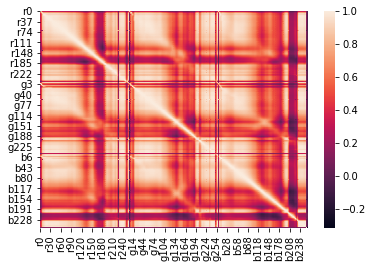

In [17]:
corrMatrix = cmodel.corr()
sn.heatmap(corrMatrix, annot=False)
plt.show()

In [18]:
#32 bin regression
x = cmodel[r_cols+g_cols+b_cols]
y = cmodel['Wealth_Index']
linear_regression = LinearRegression()
linear_regression.fit(x, y)

pred = linear_regression.predict(x)


#print('Coefficients: \n', linear_regression.coef_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, pred))

print('R2: %.4f'
      % r2_score(y, pred))






Mean squared error: 1.50
R2: 0.6936


In [19]:
cmodel[['train', 'truck', 'car',  'potted plant','person']] = df[['train', 'truck', 'car',  'potted plant','person']]

In [20]:
#32 bin regression with object detection Wealth Index
x = cmodel[r_cols+g_cols+b_cols + ['train', 'truck', 'car',  'potted plant', 'person']]
y = cmodel['Wealth_Index']
linear_regression = LinearRegression()
linear_regression.fit(x, y)

pred = linear_regression.predict(x)


#print('Coefficients: \n', linear_regression.coef_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, pred))

print('R2: %.4f'
      % r2_score(y, pred))




Mean squared error: 1.40
R2: 0.7144


In [37]:
#256 bin regression with object detection for total deprevtion
x = cmodel[r_cols+g_cols+b_cols + ['train', 'truck', 'car', 'person',  'potted plant']]
y = cmodel['total_deprivations']
linear_regression = LinearRegression()
linear_regression.fit(x, y)

pred = linear_regression.predict(x)


#print('Coefficients: \n', linear_regression.coef_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, pred))

print('R2: %.4f'
      % r2_score(y, pred))




Mean squared error: 0.01
R2: 0.6466


In [38]:
#10 bin regression with object deterction for total income
x = cmodel.dropna()[r_cols+g_cols+b_cols + ['train', 'truck', 'car', 'person',  'potted plant']]
y = cmodel.dropna()['total_income_2_b']
linear_regression = LinearRegression()
linear_regression.fit(x, y)

pred = linear_regression.predict(x)


#print('Coefficients: \n', linear_regression.coef_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, pred))

print('R2: %.4f'
      % r2_score(y, pred))




Mean squared error: 5032034231.17
R2: 0.6672


In [40]:
cmodel['poor_bool'] = cmodel['Poor_MPI'] == 'Poor'
cmodel['poor_bool']

cmodel['Severely_poor_bool'] = cmodel['Severely_Poor_MPI'] == 'Poor'




In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

In [43]:
def logreg(col):
    print('Predicting for ', col)
    dep = r_cols+g_cols+b_cols + ['train', 'truck', 'car', 'person',  'potted plant']
    #print('Regressors: ', dep)
    X_train, X_test, y_train, y_test = train_test_split(cmodel[dep],cmodel[col],train_size=0.8)
    model= LogisticRegression()
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_test)
    print("Model Score: ", model.score(X_test,y_test))
    print('Mean Predicted: ', np.mean(y_predicted))
    print('Mean of all observations: ', np.mean(cmodel[col]))
    print("Number of categories: ", len(set(cmodel[col])))
    print('SDG CLASSIFIER \n')
    clf = SGDClassifier(loss="hinge", penalty="l2")
    clf.fit(X_train, y_train)
    y_predicted = clf.predict(X_test)
    print('SGDC Score: ', clf.score(X_test,y_test))
    print('Mean Predicted: ', np.mean(y_predicted))
    print('Mean of all observations: ', np.mean(cmodel[col]))

In [44]:
logreg('poor_bool')

Predicting for  poor_bool
Model Score:  0.5666666666666667
Mean Predicted:  0.6541666666666667
Mean of all observations:  0.565
Number of categories:  2
SDG CLASSIFIER 

SGDC Score:  0.5125
Mean Predicted:  0.525
Mean of all observations:  0.565


/Users/yojeremijenko-conel/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [46]:
logreg('Severely_poor_bool')

Predicting for  Severely_poor_bool
Model Score:  0.8541666666666666
Mean Predicted:  0.075
Mean of all observations:  0.10166666666666667
Number of categories:  2
SDG CLASSIFIER 

SGDC Score:  0.8375
Mean Predicted:  0.09166666666666666
Mean of all observations:  0.10166666666666667


/Users/yojeremijenko-conel/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [47]:
#Adding in color mean values to the regression

In [48]:
color_mean = pd.read_csv('rgb_mean.csv')
cmodel[['r_mean', 'g_mean', 'b_mean']] = color_mean[['r_mean', 'g_mean', 'b_mean']]

In [49]:
#32 bin regression with object detection and color means for Wealth Index
x = cmodel[r_cols+g_cols+b_cols + ['train', 'truck', 'car',  'potted plant', 'person', 'r_mean', 'g_mean', 'b_mean']]
y = cmodel['Wealth_Index']
linear_regression = LinearRegression()
linear_regression.fit(x, y)

pred = linear_regression.predict(x)


#print('Coefficients: \n', linear_regression.coef_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, pred))

print('R2: %.4f'
      % r2_score(y, pred))


Mean squared error: 1.37
R2: 0.7207


In [56]:
#246 bin regression with object deterction for total income
x = cmodel.dropna()[r_cols+g_cols+b_cols + ['train', 'truck', 'car', 'person',  'potted plant', 'r_mean', 'g_mean', 'b_mean']]
y = cmodel.dropna()['total_income_2_b']
linear_regression = LinearRegression()
linear_regression.fit(x, y)

pred = linear_regression.predict(x)


#print('Coefficients: \n', linear_regression.coef_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, pred))

print('R2: %.4f'
      % r2_score(y, pred))

Mean squared error: 4933286788.56
R2: 0.6737


In [57]:
#32 bin regression with object deterction for total income
x = cmodel[r_cols+g_cols+b_cols + ['train', 'truck', 'car', 'person',  'potted plant', 'r_mean', 'g_mean', 'b_mean']]
y = cmodel['total_deprivations']
linear_regression = LinearRegression()
linear_regression.fit(x, y)

pred = linear_regression.predict(x)


#print('Coefficients: \n', linear_regression.coef_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, pred))

print('R2: %.4f'
      % r2_score(y, pred))

Mean squared error: 0.01
R2: 0.6471


In [58]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [59]:
X = cmodel[r_cols+g_cols+b_cols + ['train', 'truck', 'car', 'person',  'potted plant', 'r_mean', 'g_mean', 'b_mean']]
y = cmodel['Wealth_Index']
est = sm.OLS(y, X)
est2 = est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Wealth_Index   R-squared (uncentered):                   0.718
Model:                            OLS   Adj. R-squared (uncentered):              0.206
Method:                 Least Squares   F-statistic:                              1.401
Date:                Fri, 29 May 2020   Prob (F-statistic):                    5.34e-05
Time:                        00:58:24   Log-Likelihood:                         -1898.0
No. Observations:                1200   AIC:                                      5344.
Df Residuals:                     426   BIC:                                      9284.
Df Model:                         774                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
r0               0.0002      0.000      0.584      0.560      -0.000       0.001
r1              -0.0022      0.002     -0.960      0.337      -0.007       0.002
r2               0.0027      0.005      0.523      0.601      -0.008       0.013
r3               0.0006      0.007      0.089      0.929      -0.012       0.014
r4               0.0015      0.006      0.230      0.819      -0.011       0.014
r5              -0.0035      0.004     -0.922      0.357      -0.011       0.004
r6              -0.0007      0.003     -0.213      0.832      -0.007       0.006
r7               0.0017      0.001      1.349      0.178      -0.001       0.004
r8              -0.0007      0.001     -0.707      0.480      -0.003       0.001
r9               0.0007      0.001      0.685      0.494      -0.001       0.003
r10              0.0009      0.002      0.422      0.673      -0.003       0.005
r11             -0.0005      0.002     -0.262      0.794      -0.004       0.003
r12          -9.349e-05      0.002     -0.055      0.956      -0.003       0.003
r13              0.0006      0.002      0.302      0.763      -0.003       0.005
r14             -0.0002      0.002     -0.101      0.920      -0.005       0.004
r15             -0.0019      0.002     -0.976      0.330      -0.006       0.002
r16              0.0007      0.002      0.303      0.762      -0.004       0.005
r17              0.0008      0.003      0.315      0.753      -0.004       0.006
r18             -0.0006      0.002     -0.273      0.785      -0.005       0.004
r19              0.0010      0.002      0.426      0.670      -0.003       0.005
r20             -0.0008      0.002     -0.400      0.690      -0.005       0.003
r21              0.0009      0.002      0.437      0.662      -0.003       0.005
r22             -0.0019      0.002     -0.935      0.350      -0.006       0.002
r23              0.0022      0.002      1.207      0.228      -0.001       0.006
r24             -0.0026      0.002     -1.303      0.193      -0.006       0.001
r25              0.0010      0.002      0.558      0.577      -0.002       0.004
r26              0.0017      0.002      1.018      0.309      -0.002       0.005
r27              0.0016      0.002      0.970      0.332      -0.002       0.005
r28             -0.0034      0.002     -2.072      0.039      -0.007      -0.000
r29              0.0012      0.002      0.701      0.484      -0.002       0.005
r30             -0.0014      0.002     -0.828      0.408      -0.005       0.002
r31             -0.0001      0.002     -0.076      0.940      -0.004       0.003
r32              0.0008      0.002      0.417      0.677      -0.003       0.004
r33              0.0027      0.002      1.453      0.147      -0.001

In [60]:
X = cmodel.dropna()[r_cols+g_cols+b_cols + ['train', 'truck', 'car', 'person',  'potted plant', 'r_mean', 'g_mean', 'b_mean']]
y = cmodel.dropna()['total_income_2_b']
est = sm.OLS(y, X)
est2 = est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       total_income_2_b   R-squared (uncentered):                   0.836
Model:                            OLS   Adj. R-squared (uncentered):              0.525
Method:                 Least Squares   F-statistic:                              2.686
Date:                Fri, 29 May 2020   Prob (F-statistic):                    6.60e-27
Time:                        00:58:30   Log-Likelihood:                         -14858.
No. Observations:                1181   AIC:                                  3.126e+04
Df Residuals:                     407   BIC:                                  3.519e+04
Df Model:                         774                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
r0              17.7163     20.501      0.864      0.388     -22.586      58.018
r1              66.3154    148.561      0.446      0.656    -225.728     358.359
r2            -535.7556    336.046     -1.594      0.112   -1196.359     124.848
r3             810.0890    418.741      1.935      0.054     -13.077    1633.255
r4            -276.0248    399.841     -0.690      0.490   -1062.037     509.987
r5            -103.8515    238.541     -0.435      0.664    -572.778     365.075
r6             -36.7299    208.196     -0.176      0.860    -446.003     372.543
r7              49.4539     79.525      0.622      0.534    -106.877     205.785
r8              14.9522     65.937      0.227      0.821    -114.668     144.572
r9              87.5228     67.220      1.302      0.194     -44.619     219.665
r10           -176.7870    128.458     -1.376      0.170    -429.310      75.736
r11            120.8740    108.507      1.114      0.266     -92.431     334.179
r12            -26.9385    105.495     -0.255      0.799    -234.322     180.445
r13           -135.3802    129.010     -1.049      0.295    -388.989     118.229
r14            128.8998    142.696      0.903      0.367    -151.614     409.413
r15            -19.1259    121.016     -0.158      0.874    -257.020     218.768
r16            156.8323    138.734      1.130      0.259    -115.891     429.556
r17           -255.8122    157.213     -1.627      0.104    -564.863      53.238
r18             81.7107    142.602      0.573      0.567    -198.618     362.040
r19             15.9569    140.402      0.114      0.910    -260.047     291.961
r20             60.3479    129.633      0.466      0.642    -194.487     315.183
r21            -51.6285    125.105     -0.413      0.680    -297.561     194.304
r22             61.8982    122.980      0.503      0.615    -179.857     303.654
r23            -49.5271    114.009     -0.434      0.664    -273.648     174.594
r24           -187.1681    120.759     -1.550      0.122    -424.558      50.222
r25            141.1477    109.427      1.290      0.198     -73.965     356.260
r26             70.1571    100.780      0.696      0.487    -127.957     268.271
r27            136.9352     99.918      1.370      0.171     -59.485     333.356
r28           -172.1149    101.858     -1.690      0.092    -372.348      28.118
r29             46.9711    105.822      0.444      0.657    -161.055     254.998
r30            -60.7933    102.419     -0.594      0.553    -262.129     140.542
r31           -135.1290    108.567     -1.245      0.214    -348.550      78.292
r32            201.7078    114.917      1.755      0.080     -24.197     427.613
r33            -43.5957    119.911     -0.364      0.716    -279.317

In [ ]:
X = cmodel[r_cols+g_cols+b_cols + ['train', 'truck', 'car', 'person',  'potted plant', 'r_mean', 'g_mean', 'b_mean']]
y = cmodel['total_income_2_b']
est = sm.OLS(y, X)
est2 = est.fit()
est2.summary()

In [63]:
#Testing from a sample regression model
#32 bin regression with object detection Wealth Index
X_train, X_test, y_train, y_test = train_test_split(cmodel.dropna()[r_cols+g_cols+b_cols + ['train', 
'truck', 'car',  'potted plant', 'person']],cmodel.dropna()['total_income_2_b'],train_size=0.8)

#x = cmodel[r_cols+g_cols+b_cols + ['train', 'truck', 'car',  'potted plant', 'person']]
#y = cmodel['Wealth_Index']
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

pred = linear_regression.predict(X_train)


#print('Coefficients: \n', linear_regression.coef_)

# The mean squared error within sample
print('Mean squared error(within sample): %.2f'
      % mean_squared_error(y_train, pred))

print('R2 (within sample): %.4f'
      % r2_score(y_train, pred))


pred = linear_regression.predict(X_test)


#print('Coefficients: \n', linear_regression.coef_)

# The mean squared error within sample
print('Mean squared error(out of sample): %.2f'
      % mean_squared_error(y_test, pred))

print('R2 (out of sample): %.4f'
      % r2_score(y_test, pred))

Mean squared error(within sample): 2666485857.93
R2 (within sample): 0.8235
Mean squared error(out of sample): 333047518471.74
R2 (out of sample): -20.9503
